## **노이즈 제거**

오토인코더는 노이즈(noise)가 있는 이미지에서 노이즈를 제거하는 용도로도 사용할 수 있다.

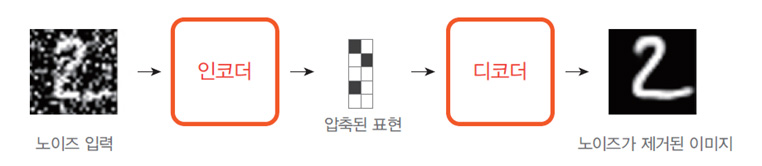

### **준비 사항: 패키지 불러오기**

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
import numpy as np

### **데이터셋 불러오기 및 데이터셋 탐색**

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database): 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

**np.random.normal(loc=0.0, scale=1.0, size=None)**
*   Mean of the distribution
*   Standard deviation of the distribution



In [5]:
noise_factor = 0.55
original_train = X_train
original_test = X_test
noise_train = np.random.normal(0, 1, original_train.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_train = original_train + noise_factor*noise_train
noisy_test = original_test + noise_factor*noise_test

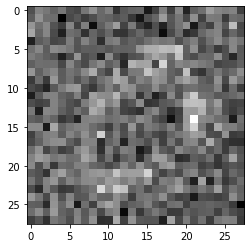

In [9]:
import matplotlib.pyplot as plt

plt.imshow(noisy_train[1].reshape(28, 28), cmap = 'gray')

In [10]:
inputs = keras.Input(shape=(784,))
encoded =layers.Dense(32, activation='relu')(inputs)
decoded =layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=inputs, outputs=decoded)

In [11]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='mse',)

In [12]:
autoencoder.fit(noisy_train, original_train, epochs=50, batch_size=256, verbose=2, shuffle=True,)

Epoch 1/50
235/235 - 2s - loss: 0.0741 - 2s/epoch - 8ms/step
Epoch 2/50
235/235 - 1s - loss: 0.0406 - 1s/epoch - 5ms/step
Epoch 3/50
235/235 - 1s - loss: 0.0332 - 809ms/epoch - 3ms/step
Epoch 4/50
235/235 - 1s - loss: 0.0293 - 988ms/epoch - 4ms/step
Epoch 5/50
235/235 - 1s - loss: 0.0267 - 815ms/epoch - 3ms/step
Epoch 6/50
235/235 - 1s - loss: 0.0250 - 923ms/epoch - 4ms/step
Epoch 7/50
235/235 - 1s - loss: 0.0237 - 942ms/epoch - 4ms/step
Epoch 8/50
235/235 - 1s - loss: 0.0229 - 988ms/epoch - 4ms/step
Epoch 9/50
235/235 - 1s - loss: 0.0224 - 1s/epoch - 4ms/step
Epoch 10/50
235/235 - 1s - loss: 0.0220 - 1s/epoch - 4ms/step
Epoch 11/50
235/235 - 1s - loss: 0.0218 - 1s/epoch - 4ms/step
Epoch 12/50
235/235 - 1s - loss: 0.0217 - 1s/epoch - 4ms/step
Epoch 13/50
235/235 - 1s - loss: 0.0216 - 914ms/epoch - 4ms/step
Epoch 14/50
235/235 - 1s - loss: 0.0215 - 924ms/epoch - 4ms/step
Epoch 15/50
235/235 - 1s - loss: 0.0215 - 912ms/epoch - 4ms/step
Epoch 16/50
235/235 - 1s - loss: 0.0214 - 968ms/epoc

### **Generative Images**

313/313 [==============================] - 1s 2ms/step


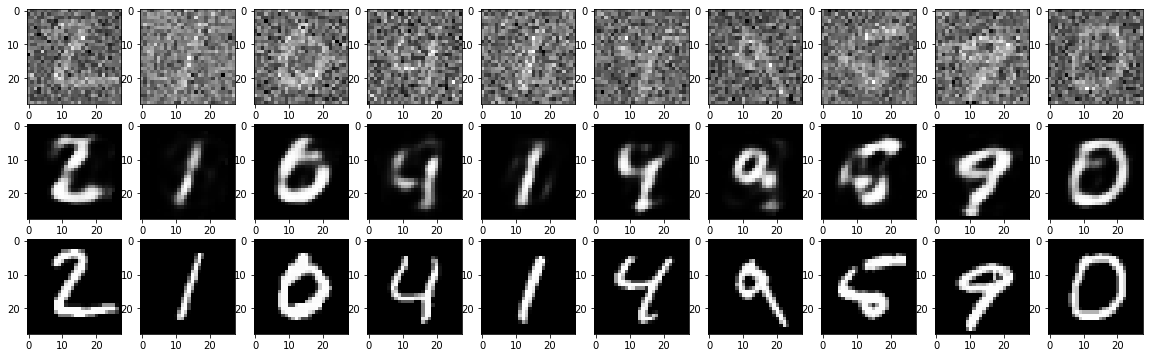

In [ ]:
import matplotlib.pyplot as plt

denoised_imgs = autoencoder.predict(noisy_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
  ax = plt.subplot(3, n, i)
  plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')

  ax = plt.subplot(3, n, i+n)
  plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')

  ax = plt.subplot(3, n, i+2*n)
  plt.imshow(original_test[i].reshape(28, 28), cmap='gray')

plt.show()